### Part 1 : Voronoi mesh generation

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys
#adding path to source directory
sys.path.insert(0, '../voronoiMeshMF6')
import geopandas as gpd
from geoVoronoi import createVoronoi
from geoUtils import plotOrgDistPoints, plotCirclesPoints, plotKeyList

In [ ]:
#Create mesh object
vorMesh = createVoronoi()

#Define base refinement and refinement levels
vorMesh.defineParameters(maxRef = 500, minRef=50, multiplier=1.5)

#Open limit layers and refinement definition layers
vorMesh.addLimit('basin','../examples/regionalModel/shp/Angascancha_Basin_Extension.shp')
vorMesh.addLayer('facilities','../examples/regionalModel/shp/rios.shp')

#Generate point pair array
vorMesh.extractOrgVertices()

#Generate the point cloud and voronoi
vorMesh.createPointCloud()
vorMesh.generateVoronoi()

#check or create an output folder
outPath = '../examples/regionalModel/output'
if os.path.isdir(outPath):
    print('The output folder %s exists'%outPath)
else:
    os.mkdir(outPath)
    print('The output folder %s has been generated.'%outPath)

#Export point data and voronoi polygons
#Points
vorMesh.getPointsAsShp('vertexOrg',outPath+'/vertexOrg.shp')
vorMesh.getPointsAsShp('vertexDist',outPath+'/vertexDist.shp')
vorMesh.getPointsAsShp('vertexBuffer',outPath+'/vertexBuffer.shp')
vorMesh.getPointsAsShp('vertexMaxRef',outPath+'/vertexMaxRef.shp')
vorMesh.getPointsAsShp('vertexMinRef',outPath+'/vertexMinRef.shp')
vorMesh.getPointsAsShp('vertexTotal',outPath+'/vertexTotal.shp')
#Polygons

vorMesh.getPolyAsShp('voronoiRegions',outPath+'/voronoiRegions.shp')


In [2]:
# Show the resulting voronoi mesh

#open the mesh file
mesh=gpd.read_file(outPath+'/voronoiRegions.shp')

<Axes: >

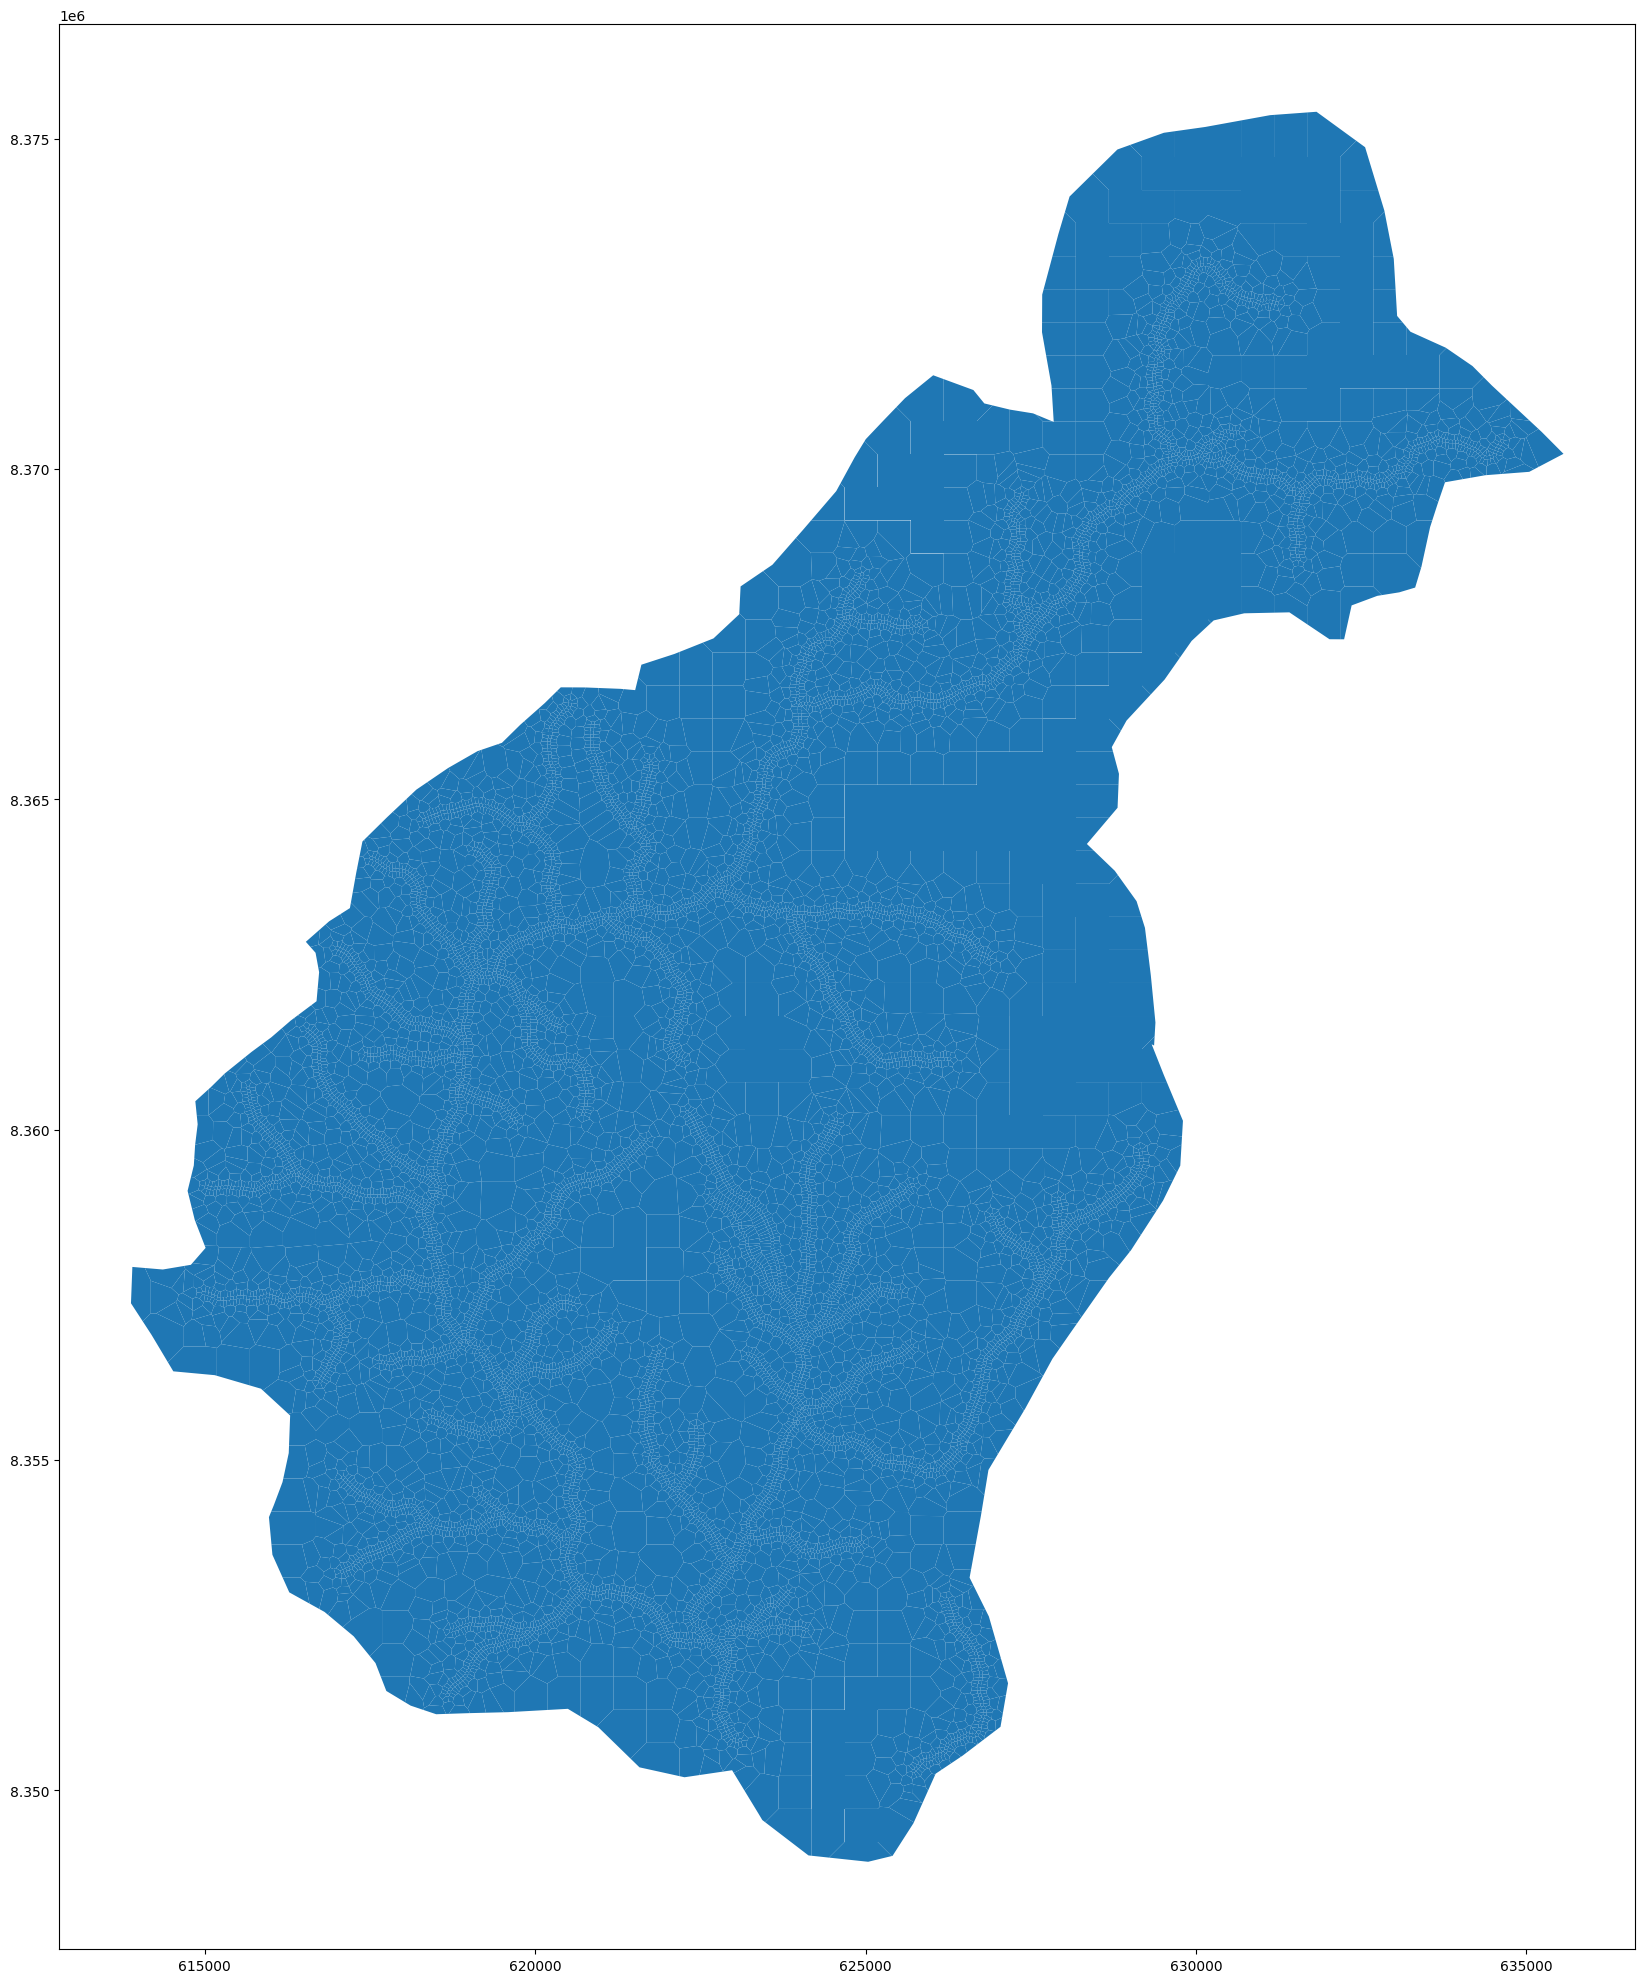

In [3]:
#plot the mesh
mesh.plot(figsize=(35,25))